# 04 Homework
© Copyright: 2024, Selma Hadzic, all rights reserved.

#### Number of points: 15 (weights 15% in the final grade)


1. Pull from the `ESMT_2024_DataScraping_Lectures` repository: you should get this `04_Homework` file
2. Launch VS Code and open your working-folder
3. Create a `Session_04` folder, in which you create another folder called `data`
4. Copy paste the notebook `04_Homework` from the lectures repo to the working-folder. Copy the csv file `WHO_COVID19_cases.csv` into the `working-folder/Session_04/data` directory.
5. Do the exercises on 04_Homework in your working-folder
6. Once you are finished, copy-Paste the notebook into `ESMT_2024_DataScraping_Students` folder in your computer
8. Commit and push your homework in your branch before the deadline

#### Deadline: October 24th 01:29 pm CET

#### Any missed deadline without justification to the Administration will result in 0 points for this homework.
#### If the Github branch is not correctly named using the indicated format **LASTNAME_firstname**, then a penalty of -2 points will be applied

## Dataset: use the WHO_COVID19_cases.csv dataset from Session_01

## 1- Filter the data for 3 countries and draw a line plot for Cumulative_cases vs Date_reported using seaborn (7.5 points)

*Tip: you may want to explore `plt.xticks(rotation=90);` and `plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(6)) ;` to unclutter the dates on the x-axis*

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [74]:
covid_data = pd.read_csv('./data/WHO_COVID19_cases.csv')
covid_data.head()
#covid_data['Country'].unique()

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0


In [98]:
covid_filtered = covid_data[covid_data['Country'].isin(['United States of America', 'Russian Federation', 'China'])]

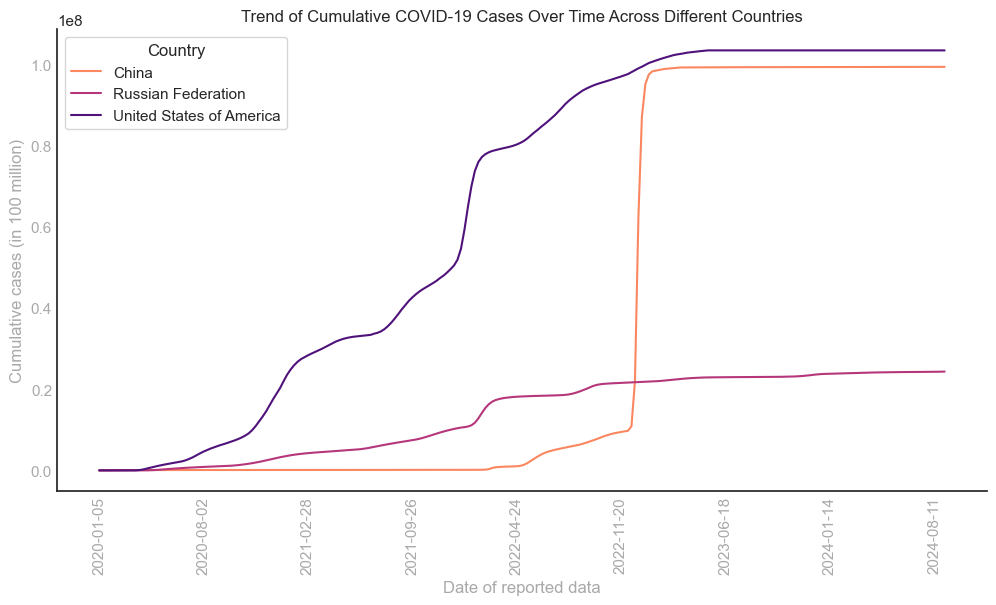

In [118]:
plt.figure(figsize = (12, 6))

sns.lineplot(x = 'Date_reported', 
             y = 'Cumulative_cases', 
             data = covid_filtered,
             hue = 'Country', 
             palette = 'magma_r').set(title = 'Trend of Cumulative COVID-19 Cases Over Time Across Different Countries');

plt.xlabel("Date of reported data", color = 'darkgrey'),
plt.ylabel("Cumulative cases (in 100 million)", color = 'darkgrey'),
plt.xticks(color = 'darkgrey'),
plt.yticks(color = 'darkgrey')
plt.tick_params(axis = 'both', which = 'both', length = 0)

sns.despine()

plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(30))

## 2- Make a line plot showing the cumulative_deaths vs cumulative_cases for 3 countries using `plotly` (7.5 points)

In [44]:
import plotly.express as px

In [167]:
interactive_plot = px.line(covid_filtered, 
                           x = 'Cumulative_cases', 
                           y = 'Cumulative_deaths', 
                           color = 'Country', 
                           labels = {'Cumulative_cases': 'Cumulative Cases', 
                                     'Cumulative_deaths': 'Cumulative Deaths'},
                           title = 'Relationship Between Cumulative COVID-19 Cases and Deaths Across Different Countries')

interactive_plot.update_layout(
    plot_bgcolor = 'rgba(230, 230, 230, 1)')

interactive_plot.update_layout(
    legend = dict(
        title = 'Country',
        x = 0.01,
        y = 0.98))

In [169]:
interactive_plot.show(renderer='browser')